In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.dates as mdates  # Import date handling
import numpy as np

In [3]:
#ground-truth
df_ode_results = pd.read_excel('../data/groundtruth_compartments.xlsx')
#data from 2012-2018
daily_data_compartments = df_ode_results
start_date = '2012-01-01 00:00:00'
#start_date = '2010-01-01 00:00:00'
end_date = '2018-12-31 00:00:00'
# Filter rows for a date range (e.g., from '2012-01-01' to '2018-12-31')
data = daily_data_compartments[(daily_data_compartments['Date'] >= start_date) & (daily_data_compartments['Date'] <= end_date)]
start_Day = 0
end_Day = 2531
data = data.loc[start_Day:end_Day]

In [4]:
sequence_length = 1
train_size = 2191

In [5]:
# Load Ih prediction data (for training part) from Excel files
df_flood_train = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_train.xlsx")
df_floodIh_train = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_train.xlsx")

df_rain_train = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_train.xlsx")
df_raincases_train = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_train.xlsx")

df_floodTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")

df_rainTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_train.xlsx")
df_rainTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_train.xlsx")

# Load Ih prediction data (for testing part) from Excel files
df_flood_test = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_test.xlsx")
df_floodIh_test = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test.xlsx")
#df_floodIh_test = pd.read_excel("predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rain_test = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_test.xlsx")
df_raincases_test = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_test.xlsx")

df_floodTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_train = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_test = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rainTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_test.xlsx")
df_rainTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_test.xlsx")

#Aj Ih
df_ode_results_previous_work = pd.read_excel('../data/data.xlsx')
data_previous_work = df_ode_results_previous_work[(df_ode_results_previous_work['Date'] >= start_date) & (df_ode_results_previous_work['Date'] <= end_date)]

data_previous_work = data_previous_work.loc[start_Day:end_Day]
#data_previous_work.columns

In [6]:
# Combine train and test for each scenario
df_flood = pd.concat([df_flood_train, df_flood_test], ignore_index=True)
df_floodIh = pd.concat([df_floodIh_train, df_floodIh_test], ignore_index=True)

df_rain = pd.concat([df_rain_train, df_rain_test], ignore_index=True)
df_raincases = pd.concat([df_raincases_train, df_raincases_test], ignore_index=True)

df_floodTEMP = pd.concat([df_floodTEMP_train, df_floodTEMP_test], ignore_index=True)
df_floodTEMPcases = pd.concat([df_floodTEMPcases_train, df_floodTEMPcases_test], ignore_index=True)

df_rainTEMP = pd.concat([df_rainTEMP_train, df_rainTEMP_test], ignore_index=True)
df_rainTEMPcases = pd.concat([df_rainTEMPcases_train, df_rainTEMPcases_test], ignore_index=True)


In [7]:
# Load β_hL prediction data (for training part) from CSV files 
df_flood_train = pd.read_csv("../results/predicted_betaHL_1stmodel_flood_train.csv")
df_floodIh_train = pd.read_csv("../results/predicted_betaHL_1stmodel_floodIh_train.csv")

df_rain_train = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_train.csv")
df_raincases_train = pd.read_csv("../results/predicted_betaHL_1stmodel_raincases_train.csv")

df_floodTEMP_train = pd.read_csv("../results/predicted_betaHL_1stmodel_floodandTEMP_train.csv")
df_floodTEMPcases_train = pd.read_csv("../results/predicted_betaHL_1stmodel_floodTEMPcases_train.csv")

df_rainTEMP_train = pd.read_csv("../results/predicted_betaHL_1stmodel_rainTEMP_train.csv")
df_rainTEMPcases_train = pd.read_csv("../results/predicted_betaHL_1stmodel_rainTEMPcases_train.csv")

# Load β_hL prediction data (for testing part) from CSV files
df_flood_test = pd.read_csv("../results/predicted_betaHL_1stmodel_flood_test.csv")
df_floodIh_test = pd.read_csv("../results/predicted_betaHL_1stmodel_floodIh_test.csv")

df_rain_test = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_test.csv")
df_raincases_test = pd.read_csv("../results/predicted_betaHL_1stmodel_raincases_test.csv")

df_floodTEMP_test = pd.read_csv("../results/predicted_betaHL_1stmodel_floodandTEMP_test.csv")
df_floodTEMPcases_test = pd.read_csv("../results/predicted_betaHL_1stmodel_floodTEMPcases_test.csv")

df_rainTEMP_test = pd.read_csv("../results/predicted_betaHL_1stmodel_rainTEMP_test.csv")
df_rainTEMPcases_test = pd.read_csv("../results/predicted_betaHL_1stmodel_rainTEMPcases_test.csv")


In [8]:
# Combine train and test for each scenario
df_betaHL_flood = pd.concat([df_flood_train, df_flood_test], ignore_index=True)
df_betaHL_floodIh = pd.concat([df_floodIh_train, df_floodIh_test], ignore_index=True)

df_betaHL_rain = pd.concat([df_rain_train, df_rain_test], ignore_index=True)
df_betaHL_raincases = pd.concat([df_raincases_train, df_raincases_test], ignore_index=True)

df_betaHL_floodTEMP = pd.concat([df_floodTEMP_train, df_floodTEMP_test], ignore_index=True)
df_betaHL_floodTEMPcases = pd.concat([df_floodTEMPcases_train, df_floodTEMPcases_test], ignore_index=True)

df_betaHL_rainTEMP = pd.concat([df_rainTEMP_train, df_rainTEMP_test], ignore_index=True)
df_betaHL_rainTEMPcases = pd.concat([df_rainTEMPcases_train, df_rainTEMPcases_test], ignore_index=True)


In [9]:
df_betaHL_flood

,Date,Scaled_BetaHL_Pred
0,2012-01-02,1.699058
1,2012-01-03,1.699058
2,2012-01-04,1.642874
3,2012-01-05,1.642874
4,2012-01-06,1.642874
...,...,...
2526,2018-12-02,2.036162
2527,2018-12-03,1.979978
2528,2018-12-04,1.923794
2529,2018-12-05,1.867610


# Figure 2

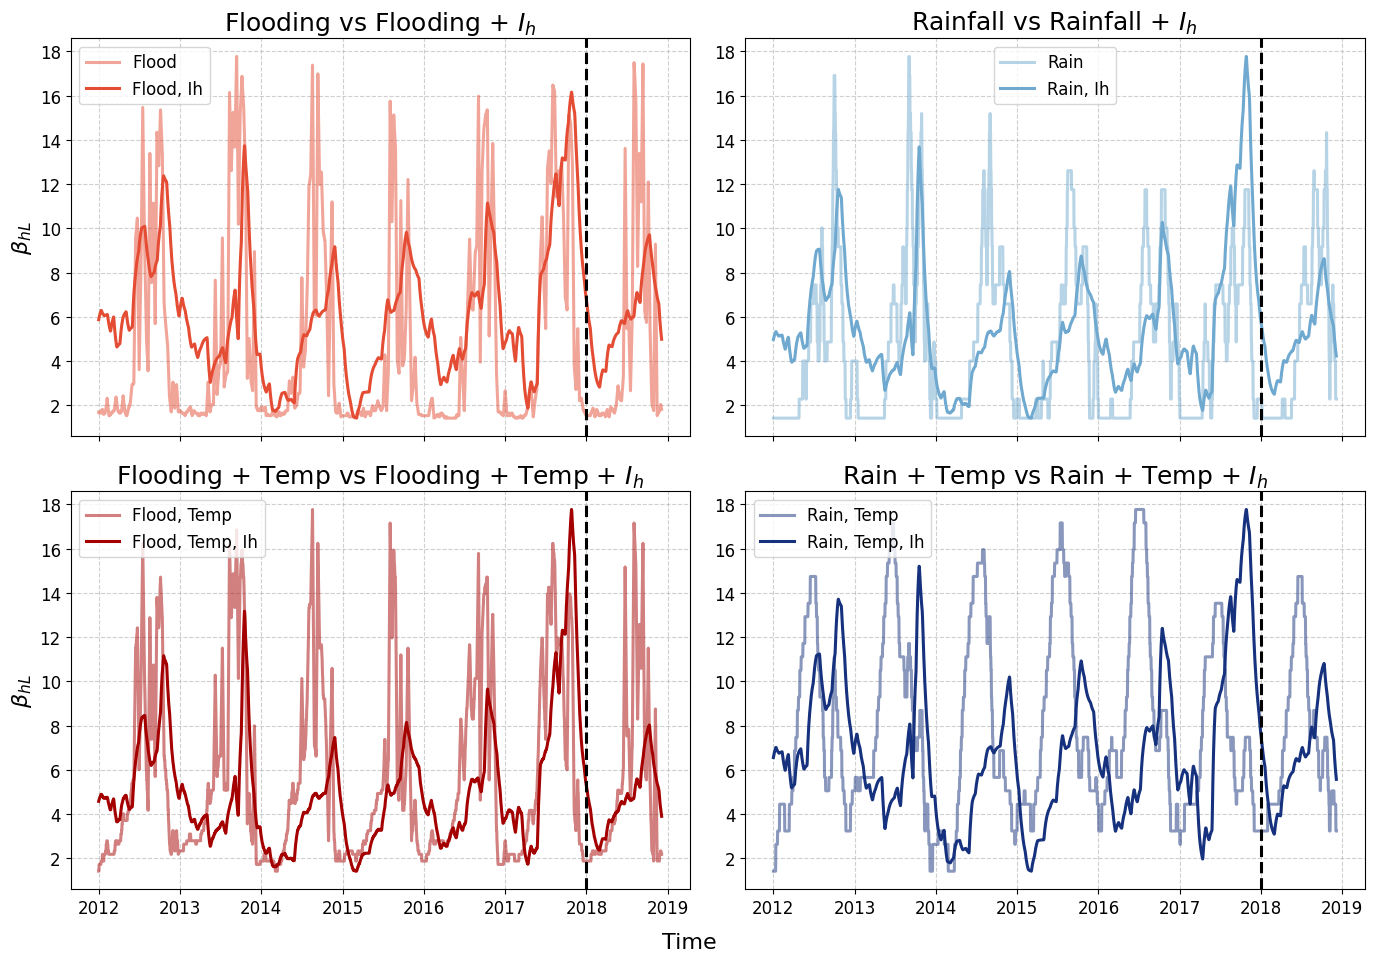

In [13]:

# Update font and line styles globally
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2.2
})

# Load the common time axis from covariates
df_covariates = pd.read_excel("../data/covariates_date.xlsx")
start_Day = 0
end_Day = 2531
time_axis = df_covariates["Date"][start_Day:end_Day]

# Extract β_hL values
betaHL_flood = df_betaHL_flood.iloc[:, 1]
betaHL_floodIh = df_betaHL_floodIh.iloc[:, 1]
betaHL_rain = df_betaHL_rain.iloc[:, 1]
betaHL_raincases = df_betaHL_raincases.iloc[:, 1]
betaHL_floodTEMP = df_betaHL_floodTEMP.iloc[:, 1]
betaHL_floodTEMPcases = df_betaHL_floodTEMPcases.iloc[:, 1]
betaHL_rainTEMP = df_betaHL_rainTEMP.iloc[:, 1]
betaHL_rainTEMPcases = df_betaHL_rainTEMPcases.iloc[:, 1]

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, betaHL_flood, label="Flood", color='#E44C34', alpha=0.5)
axes[0, 0].plot(time_axis, betaHL_floodIh, label="Flood, Ih", color='#E44C34')
axes[0, 0].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[0, 0].set_title(r"Flooding vs Flooding + $I_h$")
axes[0, 0].set_ylabel(r"$\beta_{hL}$")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, betaHL_rain, label="Rain", color='#70A9CF', alpha=0.5)
axes[0, 1].plot(time_axis, betaHL_raincases, label="Rain, Ih", color='#70A9CF')
axes[0, 1].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[0, 1].set_title(r"Rainfall vs Rainfall + $I_h$")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temp vs Flood + Temp + Ih
axes[1, 0].plot(time_axis, betaHL_floodTEMP, label="Flood, Temp", color='#a40000', alpha=0.5)
axes[1, 0].plot(time_axis, betaHL_floodTEMPcases, label="Flood, Temp, Ih", color='#a40000')
axes[1, 0].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[1, 0].set_title(r"Flooding + Temp vs Flooding + Temp + $I_h$")
axes[1, 0].set_ylabel(r"$\beta_{hL}$")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temp vs Rain + Temp + Ih
axes[1, 1].plot(time_axis, betaHL_rainTEMP, label="Rain, Temp", color='#16317d', alpha=0.5)
axes[1, 1].plot(time_axis, betaHL_rainTEMPcases, label="Rain, Temp, Ih", color='#16317d')
axes[1, 1].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[1, 1].set_title(r"Rain + Temp vs Rain + Temp + $I_h$")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Common X-axis label
fig.text(0.5, 0.04, "Time", ha="center", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # reserve space for common x-axis

# Save in multiple formats with high resolution
output_base = "../figures/predicted_betaHL_plot_1stmodel_factorsIh_recom2_"
#for ext in ['png', 'svg', 'eps', 'tiff', 'pdf']:
#    plt.savefig(f"{output_base}.{ext}", dpi=300, bbox_inches='tight')

plt.show()


# Figure 3

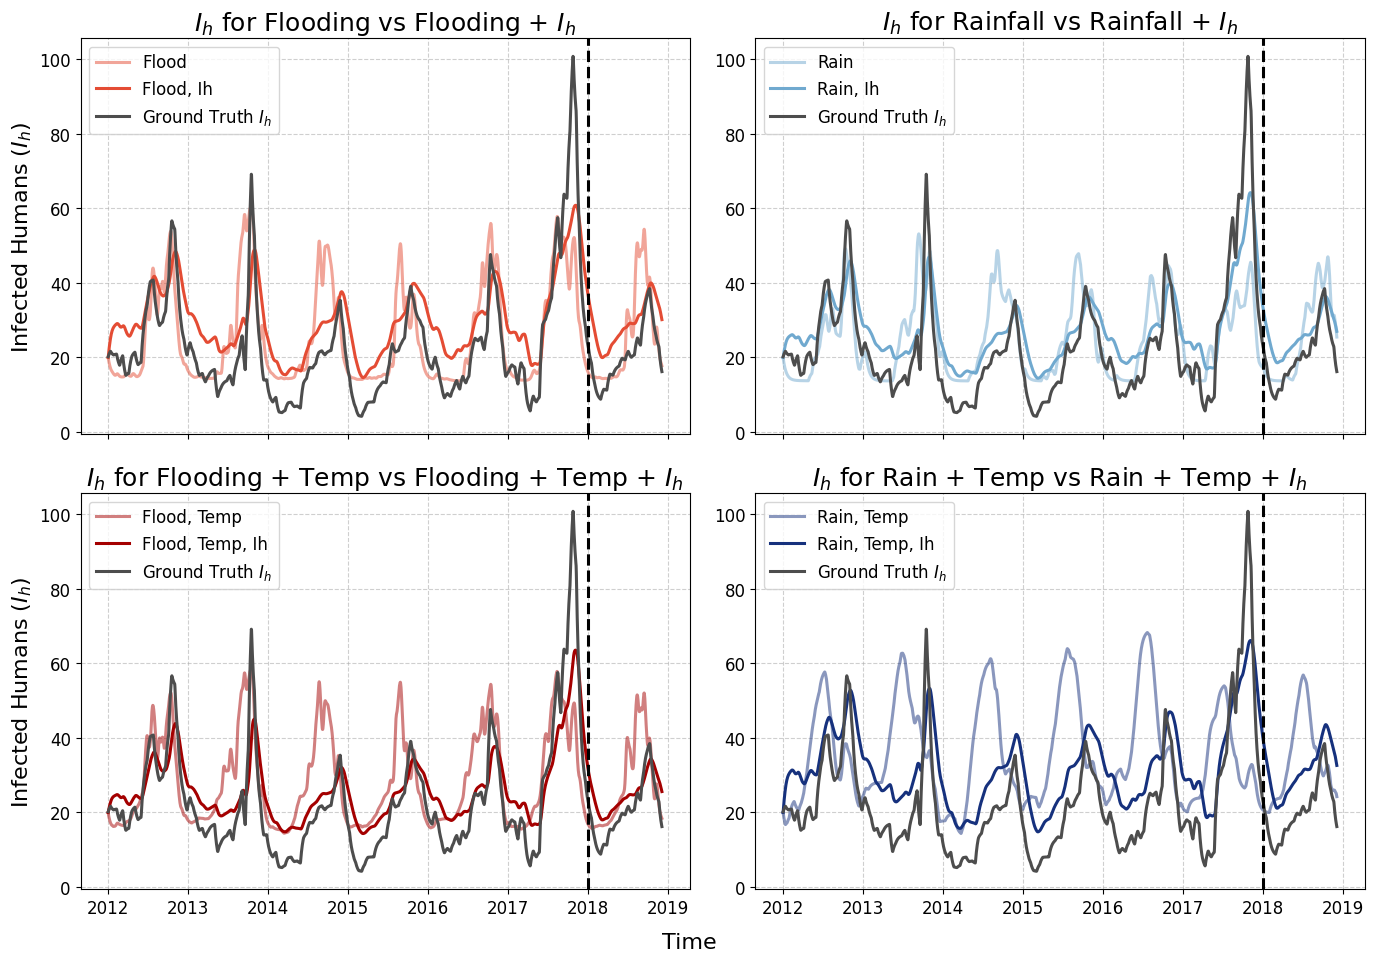

In [14]:
# Apply global figure settings
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2.2
})

# Load the common time axis from covariates
df_covariates = pd.read_excel("../data/covariates_date.xlsx")
start_Day = 0
end_Day = 2531
time_axis = df_covariates["Date"][start_Day:end_Day]

# Extract Ih predictions
Ih_flood = df_flood["Ih_pred"]
Ih_floodIh = df_floodIh["Ih_pred"]
Ih_rain = df_rain["Ih_pred"]
Ih_raincases = df_raincases["Ih_pred"]
Ih_floodTEMP = df_floodTEMP["Ih_pred"]
Ih_floodTEMPcases = df_floodTEMPcases["Ih_pred"]
Ih_rainTEMP = df_rainTEMP["Ih_pred"]
Ih_rainTEMPcases = df_rainTEMPcases["Ih_pred"]

# Ground truth Ih
Ih_groundtruth = data["Ih"][sequence_length:].values

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, Ih_flood, label="Flood", color='#E44C34', alpha=0.5)
axes[0, 0].plot(time_axis, Ih_floodIh, label="Flood, Ih", color='#E44C34')
axes[0, 0].plot(time_axis, Ih_groundtruth, label='Ground Truth $I_h$', color="#4d4d4d")
axes[0, 0].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[0, 0].set_title(r"$I_h$ for Flooding vs Flooding + $I_h$")
axes[0, 0].set_ylabel("Infected Humans ($I_h$)")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, Ih_rain, label="Rain", color='#70A9CF', alpha=0.5)
axes[0, 1].plot(time_axis, Ih_raincases, label="Rain, Ih", color='#70A9CF')
axes[0, 1].plot(time_axis, Ih_groundtruth, label='Ground Truth $I_h$', color="#4d4d4d")
axes[0, 1].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[0, 1].set_title(r"$I_h$ for Rainfall vs Rainfall + $I_h$")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temp vs Flood + Temp + Ih
axes[1, 0].plot(time_axis, Ih_floodTEMP, label="Flood, Temp", color='#a40000', alpha=0.5)
axes[1, 0].plot(time_axis, Ih_floodTEMPcases, label="Flood, Temp, Ih", color='#a40000')
axes[1, 0].plot(time_axis, Ih_groundtruth, label='Ground Truth $I_h$', color="#4d4d4d")
axes[1, 0].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[1, 0].set_title(r"$I_h$ for Flooding + Temp vs Flooding + Temp + $I_h$")
axes[1, 0].set_ylabel("Infected Humans ($I_h$)")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temp vs Rain + Temp + Ih
axes[1, 1].plot(time_axis, Ih_rainTEMP, label="Rain, Temp", color='#16317d', alpha=0.5)
axes[1, 1].plot(time_axis, Ih_rainTEMPcases, label="Rain, Temp, Ih", color='#16317d')
axes[1, 1].plot(time_axis, Ih_groundtruth, label='Ground Truth $I_h$', color="#4d4d4d")
axes[1, 1].axvline(x=time_axis.iloc[train_size], color="k", linestyle="--")
axes[1, 1].set_title(r"$I_h$ for Rain + Temp vs Rain + Temp + $I_h$")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Common x-axis label
fig.text(0.5, 0.04, "Time", ha="center", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save in multiple formats
output_base = "../figures/predicted_Ih_plot_1stmodel_factorsIh_also_groundtruth_recom2_"
#for ext in ['png', 'svg', 'eps', 'tiff', 'pdf']:
#    plt.savefig(f"{output_base}.{ext}", dpi=300, bbox_inches='tight')

plt.show()


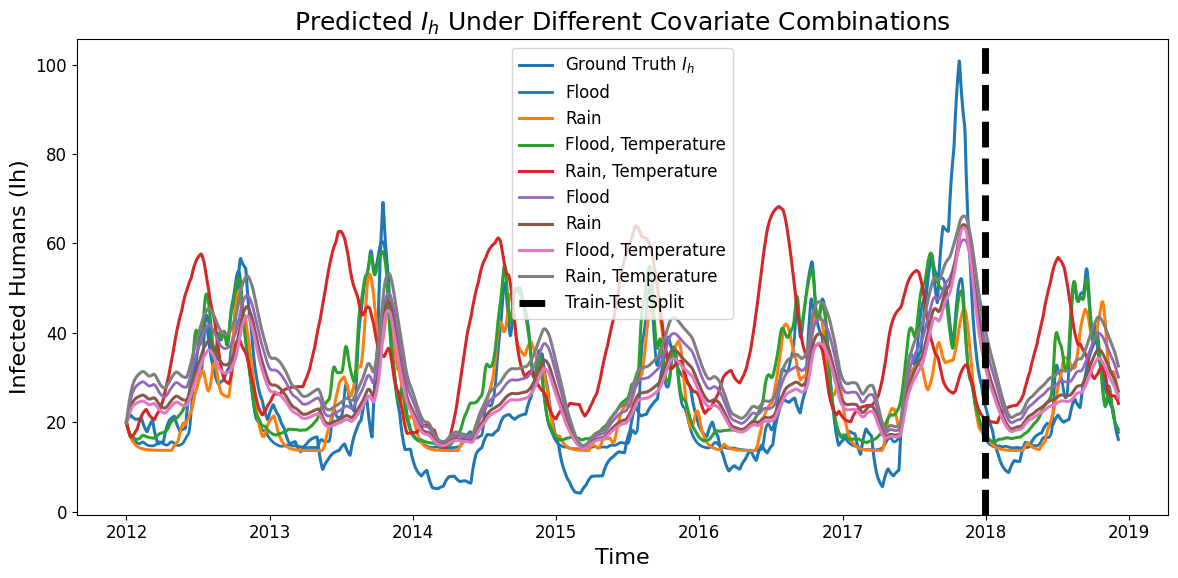

In [16]:

# Create a single plot
plt.figure(figsize=(12, 6))
#plot(time_axis, Ih_groundtruth, label="Groundtruth Ih", color='blue', linestyle="solid")
# Plot groundtruth Ih
plt.plot(time_axis, data["Ih"][sequence_length:].values, label='Ground Truth $I_h$', color="#1f77b4")

# Plot forecasted Ih
plt.plot(time_axis, Ih_flood, label="Flood", linestyle="-", linewidth=2)
plt.plot(time_axis, Ih_rain, label="Rain", linestyle="-")
plt.plot(time_axis, Ih_floodTEMP, label="Flood, Temperature", linestyle="-")
plt.plot(time_axis, Ih_rainTEMP, label="Rain, Temperature", linestyle="-")
plt.plot(time_axis, Ih_floodIh, label="Flood", linestyle="-", linewidth=2)
plt.plot(time_axis, Ih_raincases, label="Rain", linestyle="-")
plt.plot(time_axis, Ih_floodTEMPcases, label="Flood, Temperature", linestyle="-")
plt.plot(time_axis, Ih_rainTEMPcases, label="Rain, Temperature", linestyle="-")
#plt.plot(time_axis, Ih_predicted, label="PE part (Hybrid Model with Flood, Temperature and Infected Humans)", color='orange')
# Add vertical line for train-test split
plt.axvline(x=time_axis.iloc[train_size], color="k", linestyle="--", linewidth=5, label="Train-Test Split")

# Formatting
plt.xlabel("Time")
plt.ylabel("Infected Humans (Ih)")
plt.title("Predicted $I_h$ Under Different Covariate Combinations")
plt.legend()
#plt.grid(True)

# Save and show the figure
plt.tight_layout()
#plt.savefig("../figures/predicted_Ih_different_covariates.png", dpi=300)
plt.show()


In [17]:
import platform

print("Platform :", platform.system(), platform.release())
print("Machine  :", platform.machine())
print("Processor:", platform.processor())
print("Node     :", platform.node())
print("Python   :", platform.python_version())


Platform : Windows 10
Machine  : AMD64
Processor: Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
Node     : LAPTOP-TJL00K96
Python   : 3.9.16


In [18]:
import platform
import psutil
import torch

# 1. Basic System / CPU Info
uname_info = platform.uname()
print("Operating System:", uname_info.system, uname_info.release)
print("Machine:", uname_info.machine)
print("Processor:", uname_info.processor)

# 2. Memory Info
mem_info = psutil.virtual_memory()
print(f"Total RAM: {mem_info.total / (1024**3):.2f} GB")

# 3. PyTorch and CUDA Info
print("PyTorch version:", torch.__version__)
print("CUDA available?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


Operating System: Windows 10
Machine: AMD64
Processor: Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
Total RAM: 15.63 GB
PyTorch version: 2.4.1+cpu
CUDA available? False
